In [63]:
import pandas as pd
df = pd.read_csv("Ecommerce_Purchases.csv")
#df.head()
#df.info()
#What is the average Purchase Price?
mean = df['Purchase Price'].mean()
print("Mean Purchase Price: ", mean)

#What were the highest and lowest purchase prices?
maxVal = df['Purchase Price'].max()
print("Max Purchase Price: ", maxVal)
minVal = df['Purchase Price'].min()
print("Minimum Purchase Price: ", minVal)

#How many people have English 'en' as their Language of choice on the website?
lang=df['Language']
test_keys = lang.unique()
langList = df['Language'].tolist()
for x in test_keys:
    print("Language: ", x ,'and its count', langList.count(x))

#How many people have the job title of "Lawyer" ?
job=df['Job']
job_keys = job.unique()
jobList = df['Job'].tolist()

for j in job_keys:
    if(j == 'Lawyer'):
        print("There are",jobList.count(j), 'people with Job title as', j)

#How many people made the purchase during the AM and how many people made the purchase during PM ?
ctVal = df['AM or PM'].value_counts()
print("Preferred booking time AM or PM", ctVal)

#What are the 5 most common Job Titles?
jtype = df['Job'].value_counts()[0:5]
print(jtype)

#Someone made a purchase that came from Lot: "90 WT" , what was the Purchase Price for this transaction?
retVal = df[df['Lot']=="90 WT"]['Purchase Price']
print(retVal)

#How many people have American Express as their Credit Card Provider and made a purchase above $95 ?
sety=df[df["CC Provider"]=="American Express"]
cardVal = sety[sety["Purchase Price"]>95].count()
print(cardVal)

#Hard: How many people have a credit card that expires in 2025?
df[df["CC Exp Date"].apply(lambda x: x[3:]=='25')].count()
sum(df["CC Exp Date"].apply(lambda x: x[3:])=='25')

#df["CC Exp Date"]
#Hard: What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...)
df["Email"].str.split('@').str[1].value_counts().head(5)
df["Email"].apply(lambda x: x.split('@')[1]).value_counts().head(5)

Mean Purchase Price:  50.34730200000025
Max Purchase Price:  99.99
Minimum Purchase Price:  0.0
Language:  el and its count 1137
Language:  fr and its count 1097
Language:  de and its count 1155
Language:  es and its count 1095
Language:  ru and its count 1155
Language:  pt and its count 1118
Language:  zh and its count 1059
Language:  en and its count 1098
Language:  it and its count 1086
There are 30 people with Job title as Lawyer
Preferred booking time AM or PM PM    5068
AM    4932
Name: AM or PM, dtype: int64
Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Research officer, political party    27
Purchasing manager                   27
Name: Job, dtype: int64
513    75.1
Name: Purchase Price, dtype: float64
Address             39
Lot                 39
AM or PM            39
Browser Info        39
Company             39
Credit Card         39
CC Exp Date         39
CC Security Code    39
CC Provider         39

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

df = pd.read_csv("Ecommerce_Purchases.csv")
df.head()

#fig, axs = plt.subplots(1,2)

#sns.distplot(df['Purchase Price'])
sns.distplot(df['Purchase Price'].plot(ax=axs[1]), kde = False , bins = 30)
#sns.distplot(df['Company'])


NameError: name 'axs' is not defined

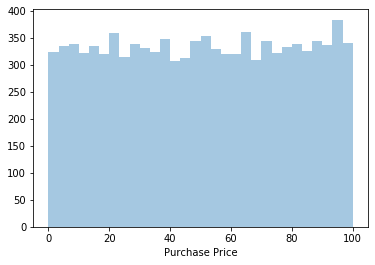

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

df = pd.read_csv("Ecommerce_Purchases.csv")
df.head()

#fig, axs = plt.subplots(1,2)

sns.distplot(df['Purchase Price'], kde = False , bins = 30)



['el' 'fr' 'de' 'es' 'ru' 'pt' 'zh' 'en' 'it']
PM    5068
AM    4932
Name: AM or PM, dtype: int64
el 1137
fr 1097
de 1155
es 1095
ru 1155
pt 1118
zh 1059
en 1098
it 1086


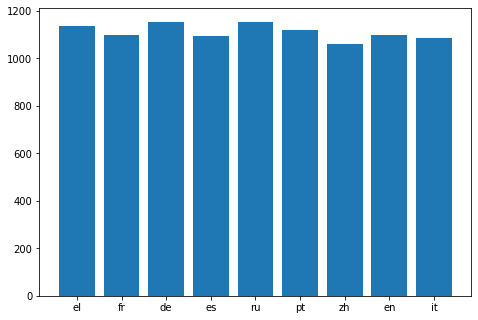

In [9]:
import matplotlib.pyplot as plotter

df = pd.read_csv("Ecommerce_Purchases.csv")
# The slice names of a population distribution pie chart
lang=df['Language']
uniq = lang.unique()
print(uniq)
val = df['AM or PM'].value_counts()
print(val)
langList = df['Language'].tolist()
myList = []

for x in uniq:
    print(x, langList.count(x))
    myList.append(langList.count(x))
        
fig = plotter.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(uniq,myList)
plotter.show()

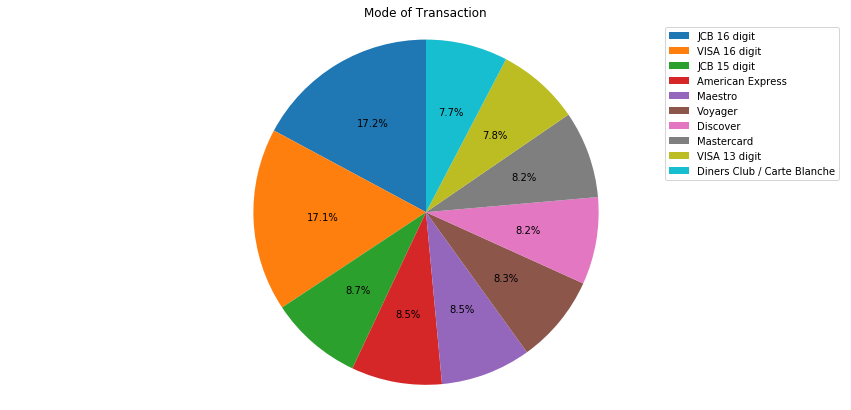

In [26]:
count_paymentMode=df["CC Provider"].value_counts()
count_paymentMode=count_paymentMode[count_paymentMode>100]
fig1, ax1 = plotter.subplots(figsize=(15,7))
ax1.pie(count_paymentMode.values, autopct='%1.1f%%', radius=2000, startangle=90)
ax1.axis('equal')
plotter.title("Mode of Transaction")
plotter.legend(count_paymentMode.index)
plotter.show()

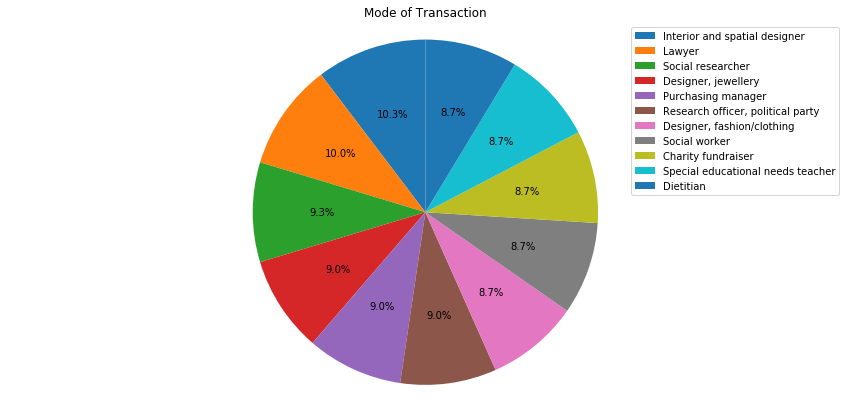

In [25]:
count_paymentMode=df["Job"].value_counts()
count_paymentMode=count_paymentMode[count_paymentMode>25]
fig1, ax1 = plotter.subplots(figsize=(15,7))
ax1.pie(count_paymentMode.values, autopct='%1.1f%%', radius=2000, startangle=90)
ax1.axis('equal')
plotter.title("Mode of Transaction")
plotter.legend(count_paymentMode.index)
plotter.show()

In [6]:
import matplotlib.pyplot as plotter

df = pd.read_csv("Ecommerce_Purchases.csv")
# The slice names of a population distribution pie chart
lang=df['Company']
uniq = lang.unique()
print(uniq)

['Martinez-Herman' 'Fletcher, Richards and Whitaker'
 'Simpson, Williams and Pham' ... 'Hale, Collins and Wilson' 'Cook Inc'
 'Greene Inc']


In [17]:
from bokeh.io import output_file, show
from bokeh.plotting import figure

output_file("bars.html")

df = pd.read_csv("Ecommerce_Purchases.csv")

lang=df['Language']
uniq = lang.unique()

langList = df['Language'].tolist()
myList = []

for x in uniq:
    myList.append(langList.count(x))

p = figure(x_range=uniq, plot_height=250, title="Language Counts",
           toolbar_location=None, tools="")

p.vbar(x=uniq, top=myList, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [30]:
from math import pi

import pandas as pd

from bokeh.io import output_file, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum

lang=df['Language']
test_keys = lang.unique()

langList = df['Language'].tolist()

myList = []

for x in test_keys:
    myList.append(langList.count(x))

test_values = myList
  
# Printing original keys-value lists 
print ("Original key list is : " + str(test_keys)) 
print ("Original value list is : " + str(test_values)) 
  
# using dictionary comprehension 
# to convert lists to dictionary 
x = {test_keys[i]: test_values[i] for i in range(len(test_keys))} 
  
data = pd.Series(x).reset_index(name='value').rename(columns={'index':'country'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
        tools="hover", tooltips="@country: @value")

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='country', source=data)

show(p)

Original key list is : ['el' 'fr' 'de' 'es' 'ru' 'pt' 'zh' 'en' 'it']
Original value list is : [1137, 1097, 1155, 1095, 1155, 1118, 1059, 1098, 1086]
Resultant dictionary is : {'el': 1137, 'fr': 1097, 'de': 1155, 'es': 1095, 'ru': 1155, 'pt': 1118, 'zh': 1059, 'en': 1098, 'it': 1086}


In [58]:
from bokeh.io import output_file, show
from bokeh.plotting import figure

output_file("bars.html")

df = pd.read_csv("Ecommerce_Purchases.csv")

lang=df['Job']
uniq = lang.unique()

langList = df['Job'].tolist()
myList = []

for x in uniq:
    myList.append(langList.count(x))

p = figure(x_range=uniq, plot_height=250, title="Job Counts",
           toolbar_location=None, tools="")

p.vbar(x=uniq, top=myList, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [92]:
from math import pi

import pandas as pd

from bokeh.io import output_file, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.layouts import column

output_file("bars.html")

lang=df['Language']
lang_keys = lang.unique()

langList = df['Language'].tolist()

myLangList = []

for x in lang_keys:
    myLangList.append(langList.count(x))

lang_values = myLangList
  
# using dictionary comprehension 
# to convert lists to dictionary 
x = {lang_keys[i]: lang_values[i] for i in range(len(lang_keys))} 
  
data = pd.Series(x).reset_index(name='value').rename(columns={'index':'country'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p = figure(plot_width=900, plot_height=400, title="Language Count", toolbar_location=None,
        tools="hover", tooltips="@country: @value")

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='country', source=data)


jobList = df['Job'].value_counts().head(10)
jobKeys = jobList.keys().tolist()
jobVals = jobList.tolist()

p1 = figure(x_range=jobKeys, plot_width=900, plot_height=400, title="Job Counts", toolbar_location=None, tools="")

p1.vbar(x=jobKeys, top=jobVals, width=0.4)

p1.xgrid.grid_line_color = None
p1.y_range.start = 0
p1.xaxis.major_label_orientation = pi/-6

jtype = df['Job'].value_counts()[0:5]
jkeys = jtype.keys().tolist()
jvals = jtype.tolist()

source = ColumnDataSource(data=dict(jkeys=jkeys, jvals=jvals, color=Spectral6))

p3 = figure(x_range=jkeys, y_range=(20,30), plot_width=900, plot_height=400, title="Top 5 Counts", toolbar_location=None, tools="")

p3.vbar(x='jkeys', top='jvals', width=0.4, color='color', source=source)
p3.xgrid.grid_line_color = None
p3.xaxis.major_label_orientation = pi/-6



show(column(p, p3,p1))

In [46]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure

output_file("colormapped_bars.html")

jtype = df['Job'].value_counts()[0:5]
jkeys = jtype.keys().tolist()
jvals = jtype.tolist()

#fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
#counts = [5, 3, 4, 2, 4, 6]

source = ColumnDataSource(data=dict(jkeys=jkeys, jvals=jvals, color=Spectral6))

p = figure(x_range=jkeys, y_range=(20,30), plot_height=400, title="Top 5 Counts",
           toolbar_location=None, tools="")

p.vbar(x='jkeys', top='jvals', width=0.4, color='color', source=source)
p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = pi/-6


show(p)